## EDA and data cleaning

In [23]:
#import libraries
from matplotlib import pyplot as plt
import pandas as pd

In [24]:
# read raw post data
coffee = pd.read_csv('../data/Coffee.csv')
tea = pd.read_csv('../data/Tea.csv')

In [25]:
# There are 77 duplicated posts inside coffee posts
coffee["name"].duplicated().value_counts()

False    926
True      77
Name: name, dtype: int64

In [26]:
# No duplicated posts inside tea posts
tea["name"].duplicated().value_counts()

False    985
Name: name, dtype: int64

In [27]:
coffee.shape

(1003, 109)

In [28]:
tea.shape

(985, 116)

### Drop duplicate posts

In [29]:
# drop duplicated posts for coffee
# There is no duplicated posts for tea
bool_values = coffee["name"].duplicated(keep=False) 
coffee[bool_values].sort_values(by="name").head(10)
coffee = coffee.drop_duplicates(subset='name', keep='first')

In [30]:
coffee["name"].duplicated().value_counts()

False    926
Name: name, dtype: int64

### Null Imputation

We are only interested in 'title', 'selftext' columns. We fill in "" for missing 'selftext' since people do not write selftext for some posts. Fortunately, there is no missing for 'title'.

In [31]:
coffee[['selftext', 'title']].isnull().sum()

selftext    38
title        0
dtype: int64

In [32]:
tea[['selftext', 'title']].isnull().sum()

selftext    527
title         0
dtype: int64

In [33]:
coffee["selftext"].fillna("", inplace=True)
coffee["selftext"].isnull().sum()

0

In [34]:
tea["selftext"].fillna("", inplace=True)
tea["selftext"].isnull().sum()

0

### Combine title and selftext

We are interested in the post text. So we create a new column 'combine_text' to combine 'title' and 'selftext' for each post. 

In [35]:
coffee['combine_text'] = coffee['selftext'] +' '+coffee['title']

In [36]:
tea['combine_text'] = tea['selftext'] +' '+tea['title']

In [37]:
# Create new column 'combinetext_len' for text length of each post for both coffee and tea
coffee["combinetext_len"] = [len(i.strip()) for i in coffee["combine_text"]]
tea["combinetext_len"] = [len(i.strip()) for i in tea["combine_text"]]

Text(0, 0.5, 'frequency')

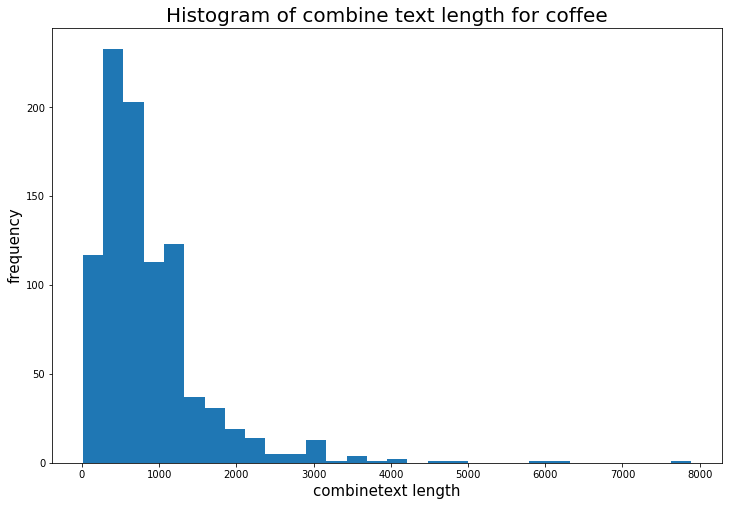

In [38]:
# Histogram plot for conbine text length for coffee posts
plt.figure(figsize=(12,8))
plt.hist(coffee["combinetext_len"], bins =30)
plt.title("Histogram of combine text length for coffee", fontsize=20)
plt.xlabel("combinetext length", fontsize=15)
plt.ylabel("frequency", fontsize=15)

- The histogram for coffee post 'combine_text' length skews to the left (towards 0). It indicates that most of text length is between 0 to 1250. The peak is around 250 to 500. 

Text(0, 0.5, 'frequency')

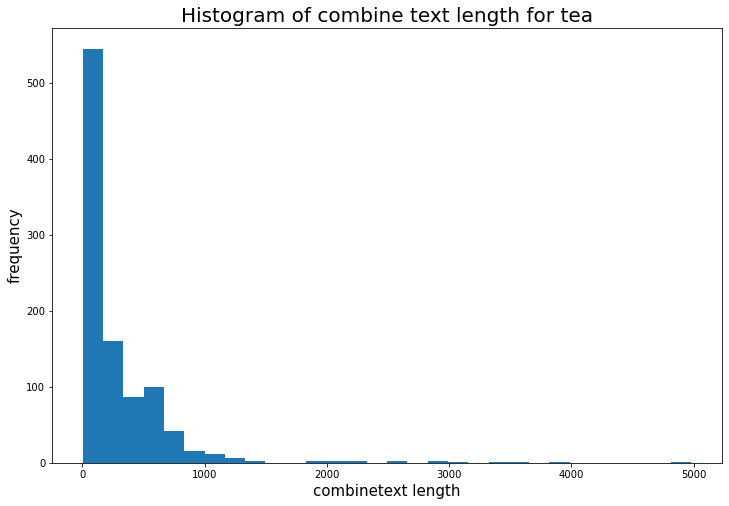

In [39]:
# Histogram plot for conbine text length for tea posts
plt.figure(figsize=(12,8))
plt.hist(tea["combinetext_len"], bins=30)
plt.title("Histogram of combine text length for tea", fontsize=20)
plt.xlabel("combinetext length", fontsize=15)
plt.ylabel("frequency", fontsize=15)

- The histogram for tea post 'combine_text' length skews to the left (towards 0). It indicates that most of text length is between 0 to 600-700. The peak is around 0 to 160~200. 

Since we have more than half of tea posts without selftext, the combine-text lengths of tea posts are much shorter than coffee posts. After data pre-processing, there may be some tea post with short content. This may lead misclassification of our model. 

### Rearrange columns

We re-arrange the columns and make sure the columns that we are interested are shown in the left side of dataframe. 

In [40]:
cols_rearrange = ["name", "subreddit", "combine_text", "title", "selftext", "url", "media", "selftext_html"]
new_columns = cols_rearrange + (coffee.columns.drop(cols_rearrange).tolist())

In [41]:
# Apply new columns for coffee dataframe
coffee=coffee[new_columns]
coffee.head()

,name,subreddit,combine_text,title,selftext,url,media,selftext_html,approved_at_utc,author_fullname,...,created_utc,num_crossposts,is_video,media_metadata,url_overridden_by_dest,author_cakeday,link_flair_template_id,is_gallery,gallery_data,combinetext_len
0,t3_o5jedn,Coffee,\n\nWelcome to the daily [/r/Coffee](https://...,[MOD] The Daily Question Thread,\n\nWelcome to the daily [/r/Coffee](https://...,https://www.reddit.com/r/Coffee/comments/o5jed...,NaN,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,t2_a04m4,...,1.624356e+09,0,False,NaN,NaN,NaN,NaN,NaN,NaN,1071
1,t3_o4g29w,Coffee,Welcome to the /r/Coffee deal and promotional ...,[MOD] The Official Deal Thread,Welcome to the /r/Coffee deal and promotional ...,https://www.reddit.com/r/Coffee/comments/o4g29...,NaN,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,t2_a04m4,...,1.624226e+09,0,False,NaN,NaN,NaN,NaN,NaN,NaN,2966
2,t3_o5dza5,Coffee,Had a barista look at me like o was an idiot a...,How do I tell a barista who doesn’t know how t...,Had a barista look at me like o was an idiot a...,https://www.reddit.com/r/Coffee/comments/o5dza...,NaN,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,t2_5osn42q,...,1.624335e+09,1,False,NaN,NaN,NaN,NaN,NaN,NaN,615
3,t3_o4t0w3,Coffee,"Hello everyone, I’m new to this sub so please ...",Cold milk foam experiments,"Hello everyone, I’m new to this sub so please ...",https://www.reddit.com/r/Coffee/comments/o4t0w...,NaN,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,t2_crl1z,...,1.624275e+09,0,False,NaN,NaN,NaN,NaN,NaN,NaN,1434
4,t3_o5ajt1,Coffee,I've been getting pre-ground coffee (Bustelo/L...,Next piece of gear for moving to fresh coffee?,I've been getting pre-ground coffee (Bustelo/L...,https://www.reddit.com/r/Coffee/comments/o5ajt...,NaN,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,t2_zykiq,...,1.624324e+09,0,False,NaN,NaN,NaN,NaN,NaN,NaN,788


In [42]:
# Apply new columns for tea dataframe
tea=tea[new_columns]
tea.head()

,name,subreddit,combine_text,title,selftext,url,media,selftext_html,approved_at_utc,author_fullname,...,created_utc,num_crossposts,is_video,media_metadata,url_overridden_by_dest,author_cakeday,link_flair_template_id,is_gallery,gallery_data,combinetext_len
0,t3_o1271n,tea,What are you drinking today? What questions h...,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...,https://www.reddit.com/r/tea/comments/o1271n/w...,NaN,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,t2_6l4z3,...,1.623841e+09,0,False,NaN,NaN,NaN,4550cede-4940-11eb-aa8a-0e816bd6b2d1,NaN,NaN,574
1,t3_nzkoyj,tea,We realize there are lots of people involved i...,"Marketing Monday! - June 14, 2021",We realize there are lots of people involved i...,https://www.reddit.com/r/tea/comments/nzkoyj/m...,NaN,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,t2_6l4z3,...,1.623670e+09,0,False,NaN,NaN,NaN,4550cede-4940-11eb-aa8a-0e816bd6b2d1,NaN,NaN,636
2,t3_o1mm4u,tea,"Tea Testing for quality check. flavor, liquor...","Tea Testing for quality check. flavor, liquor,...",,https://i.redd.it/yf0bt4k9pq571.jpg,NaN,NaN,NaN,t2_b3xdsui0,...,1.623898e+09,0,False,NaN,https://i.redd.it/yf0bt4k9pq571.jpg,NaN,8f9ceb1a-9f57-11e4-8b17-22000b2b86b1,NaN,NaN,103
3,t3_o1ezhm,tea,Hello. I decided to share with you a photo of...,Hello. I decided to share with you a photo of ...,,https://i.redd.it/09zftcu607571.jpg,NaN,NaN,NaN,t2_26zkcq1y,...,1.623876e+09,0,False,NaN,https://i.redd.it/09zftcu607571.jpg,NaN,NaN,NaN,NaN,105
4,t3_o14d2u,tea,A little black tea and cookies for breakfast ...,A little black tea and cookies for breakfast a...,,https://i.redd.it/fcyt42u0mm571.jpg,NaN,NaN,NaN,t2_48ws4g3y,...,1.623849e+09,0,False,NaN,https://i.redd.it/fcyt42u0mm571.jpg,NaN,8f9ceb1a-9f57-11e4-8b17-22000b2b86b1,NaN,NaN,81


### Define train_coffee and train_tea

We only include 'subreddit' and 'combine_text' columns in our train data. 

In [43]:
train_coffee = coffee[['subreddit', 'combine_text']]

In [44]:
train_tea = tea[['subreddit', 'combine_text']]

In [45]:
train_coffee

,subreddit,combine_text
0,Coffee,\n\nWelcome to the daily [/r/Coffee](https://...
1,Coffee,Welcome to the /r/Coffee deal and promotional ...
2,Coffee,Had a barista look at me like o was an idiot a...
3,Coffee,"Hello everyone, I’m new to this sub so please ..."
4,Coffee,I've been getting pre-ground coffee (Bustelo/L...
...,...,...
921,Coffee,\n\nWelcome to the daily [/r/Coffee](https://...
922,Coffee,"If I say I like craft beers, people probably a..."
923,Coffee,I've recently started trying to take more cont...
924,Coffee,I've recently started making coldbrew in my fr...


In [46]:
train_tea

,subreddit,combine_text
0,tea,What are you drinking today? What questions h...
1,tea,We realize there are lots of people involved i...
2,tea,"Tea Testing for quality check. flavor, liquor..."
3,tea,Hello. I decided to share with you a photo of...
4,tea,A little black tea and cookies for breakfast ...
...,...,...
980,tea,Brand new to Tea! Has anyone tried Vahdam tea...
981,tea,"A nice, relaxing day with a Dan Cong oolong a..."
982,tea,Clouds over a cup when tea is the sun.
983,tea,Benefits? of getting loose leaf at a bar.


In [47]:
# save coffee and train data to csv
train_coffee.to_csv('../data/train_coffee.csv', index = False)

In [48]:
train_tea.to_csv('../data/train_tea.csv', index = False)